In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
X_train.shape

(60000, 28, 28)

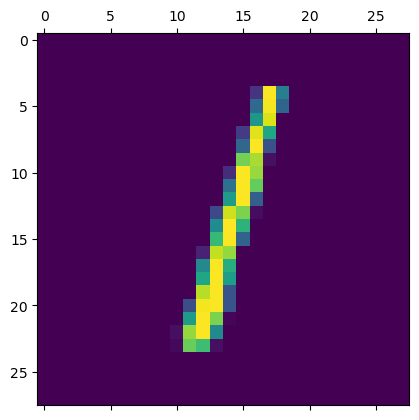

In [5]:
plt.matshow(X_test[2])

In [6]:
y_test[2]

1

In [7]:
X_train_flattened = X_train.reshape(len(X_train), 28*28) /255.0
X_test_flattened = X_test.reshape(len(X_test), 28*28) / 255.0

In [8]:
X_train_flattened.shape

(60000, 784)

In [9]:
# model = keras.Sequential([
#     keras.layers.Dense(100, input_shape=(784, ), activation = 'relu'), 
#     keras.layers.Dense(10, input_shape=(784, ), activation = 'sigmoid')
# ])

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

# model.fit(X_train_flattened, y_train, epochs=10)

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation = 'relu'), 
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)



Epoch 1/10


1875/1875 [==============================] - 9s 4ms/step - loss: 2.5413 - accuracy: 0.8493
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4176 - accuracy: 0.9024
Epoch 3/10
 447/1875 [======>.......................] - ETA: 6s - loss: 0.3170 - accuracy: 0.9231

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test_flattened, y_test)

In [ ]:
y_pred = model.predict(X_test_flattened)

In [ ]:
y_pred[0]

In [ ]:
np.argmax(y_pred[0])

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_labels = [np.argmax(i) for i in y_pred]

In [ ]:
y_test[:5]

In [ ]:
y_labels[:5]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_labels)

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')